In [1]:
import numpy as np
import jax
import jax.numpy as jnp

import pandas as pd
import matplotlib.pyplot as plt
from jax.example_libraries import optimizers

# 回帰タスクをJAXで解く

In [2]:
#回帰対象
def f(x):
    return 5 * np.exp(-2*x) + 1.5

In [4]:
#サンプリング用入力
start = 0
step_length = 0.1
limit = 1.0
num = limit/step_length + 1

xs = start + np.arange(num) * step_length

In [5]:
std = 0.5 #ノイズ
Y = [f(x) + std * np.random.normal() for x in xs]

In [6]:
xs = jnp.array(xs)
Y = jnp.array(Y)

In [7]:
#回帰モデル　３パラメータ
def g(x, p):
    return p[0] * jnp.exp(-1.0*p[1]*x) + p[2]

In [8]:
#誤差関数 (２乗誤差）
def loss(x, y, p):
    return (g(x, p) - y)**2

In [9]:
#Adamオプティマイザを利用
opt_init, opt_update, get_params = optimizers.adam(1.0)

@jax.jit
def step(x, y, step, opt_state):
    value, grads = jax.value_and_grad(loss, argnums=-1)(x, y, get_params(opt_state))
    new_opt_state = opt_update(step, grads, opt_state)
    return value, new_opt_state

def train(X, Y, p, max_itr):
    opt_state = opt_init(p)
    loss_log = []
    for _ in range(max_itr):
        for i, (x, y) in enumerate(zip(X,Y)):
            value, opt_state = step(x, y, i, opt_state)
        loss_log.append(value)
    return loss_log, get_params(opt_state)        

In [10]:
max_itr = 20
p = jnp.ones(3)
loss_log, p = train(xs, Y, p, max_itr)

In [11]:
df = pd.DataFrame()
df["x"] = xs
df["Estimated model"] = np.array([g(x, p) for x in xs])
df["f(x)"] = np.array([f(x) for x in xs])
df["Data points"] = np.array(Y)

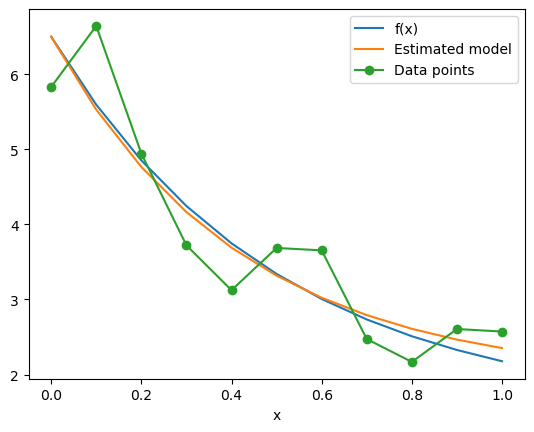

In [14]:
ax = df.plot("x", ["f(x)", "Estimated model"]);
df.plot("x",  "Data points", marker = "o", ax = ax);

In [15]:
print(p)

[4.5652037 2.3870027 1.9322916]


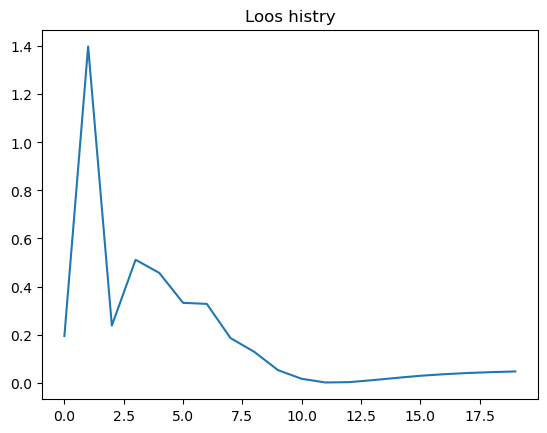

In [16]:
plt.plot(list(range(max_itr)), loss_log)
plt.title("Loos histry");